# Turkish international trade analysis
<p>
    The analysis aims to provide a general overview of Türkiye's international trade. I've decided to rely on Python as a main tool. Thus, the entire analysis is inside this notebook. The data is in 2 datasets: export and import. Values are presented in US$1000 units.
</p>
<p>
    Table of contents:
    <ol>
        <li>Data general overview, cleaning/preparation</li>
        <li>Annual data analysis</li>
        <li>Last year analysis by countries</li>
        <li>Other activities</li>
    </ol>
</p>
<p>Data source: <a href="https://data.tuik.gov.tr">https://data.tuik.gov.tr</a>

## 1. Data general overview, cleaning/preparation

### Overview

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing export dataset
dfe = pd.read_excel('export_by_countries_2023_03.xls')
#importing import dataset
dfi = pd.read_excel('import_by_countries_2023_03.xls')

#show information about columns and its data types
print(dfe.shape, dfi.shape, '\n')
print(dfe.info(), dfi.info(), sep = '\n')
print(dfe.describe().round(2), dfi.describe().round(2), sep = '\n')

(2461, 16) (2421, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        2461 non-null   int64  
 1   Unnamed: 1  2461 non-null   int64  
 2   Country     2461 non-null   object 
 3   Total       2461 non-null   float64
 4   January     2461 non-null   object 
 5   February    2461 non-null   object 
 6   March       2244 non-null   object 
 7   April       2244 non-null   object 
 8   May         2244 non-null   object 
 9   June        2244 non-null   object 
 10  July        2244 non-null   object 
 11  August      2244 non-null   object 
 12  September   2244 non-null   object 
 13  October     2244 non-null   object 
 14  November    2244 non-null   object 
 15  December    2244 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 307.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 

In [3]:
#show random 10 rows from import data to check what values occur
dfi.sample(10)

,Year,Unnamed: 1,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
2301,2013,388,Rep. of South Africa,1463590.975,61551.201,127163.815,76171.792,166589.746,141583.408,125107.626,204871.434,91767.996,40482.84,123783.094,124869.253,179648.77
1569,2016,76,Georgia,227786.555,10574.726,43954.254,35753,18834.464,19955.967,21959.976,23888.71,15531.782,7821.033,8264.413,12519.608,8728.622
133,2023,484,Venezuela,35867.142,13586.925,22280.217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2015,68,Bulgaria,2348244.699,194817.323,207149.39,221372.081,207584.844,214082.129,267254.306,195562.033,159478.044,181848.589,165268.927,167282.134,166544.899
875,2019,8,Denmark,963149.215,60543.093,165811.202,56697.17,59524.635,106143.123,157564.365,73281.737,34564.89,77169.287,55704.49,58404.773,57740.45
1080,2019,838,Niue Island,92.503,14.439,10.441,6.716,6.468,11.611,7.93,-,31.586,0.346,-,0.417,2.549
1437,2017,463,Cayman Islands,552.937,2.937,-,-,-,-,550,-,-,-,-,-,-
1647,2016,421,Belize,1595.882,1.01,11.074,700.358,-,1.532,0.616,318.54,6.566,243.978,241.689,0.508,70.011
1722,2016,724,North Korea,4961.407,111.862,117.729,55.854,26.14,16.89,403.837,2313.519,920.239,180.996,191.308,281.364,341.669
1816,2015,236,Burkina Faso,47580.903,2225.011,16.491,342.745,630.694,1501.405,55.552,4519.181,7854.928,12378.324,5580.069,9119.66,3356.843


In [4]:
#same as above but for export data
dfe.sample(10)

,Year,Unnamed: 1,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
346,2022,456,Dominican Rep.,324469.812,18871.815,12726.043,21640.466,19366.581,70463.23,38967.296,61827.884,23743.145,21979.743,8483.086,6140.478,20260.045
654,2021,815,Fiji,4230.926,224.091,202.785,214.844,148.487,1882.14,5.917,163.304,671.215,94.041,220.272,198.029,205.801
1420,2017,248,Senegal,250084.597,13181.335,15681.59,21114.42,23841.489,19173.389,17269.821,20433.988,16371.315,16068.291,22236.421,31246.154,33466.384
693,2020,39,Switzerland,1093948.311,87789.313,126827.463,63751.718,59250.338,139352.104,76372.762,70328.322,61688.862,70920.521,168130.35,90188.244,79348.314
1281,2018,520,Paraguay,40923.786,4331.615,2952.348,4140.008,2657.378,3479.487,2740.398,4031.096,2267.226,3629.586,3938.965,2621.655,4134.024
1614,2016,77,Armenia,416.480,-,-,-,-,-,1.122,7.181,-,-,-,134.607,273.57
2433,2013,736,Taiwan,119800.862,11195.207,10041.484,9531.866,8323.574,8781.626,8736.405,11577.485,9048.678,10818.006,10066.996,11362.808,10316.727
2227,2014,819,Samoa,756.759,70.594,36.75,77.75,18.5,50.375,78.42,104.484,116.5,80.25,105.736,17.4,-
1475,2017,446,Anguilla,95.834,-,-,-,-,-,-,16.576,7.221,-,-,7.104,64.933
867,2020,716,Mongolia,31826.937,2239.24,2561.103,3110.08,2067.421,1611.745,2701.094,2812.497,2838.99,3566.976,3233.525,2390.183,2694.083


<br>
We see both <i><b>-</b></i> and <i><b>NaN<b></i> values. Datasets are from 2023.03 so in 2023 only the January and Fabruary data should be filled.<br>
Also there is the <b>Unnamed: 1</b> column which is the Country code (sort of ID) according to the TURKSTAT.
<br><br>

### Data preparation

In [5]:
#change 'Unnamed: 1' column name into 'Ccode'
for x in (dfe, dfi):
    x.rename(columns={'Unnamed: 1': 'Ccode'}, inplace = True)
print(dfe.columns.values, dfi.columns.values, sep = '\n')

['Year' 'Ccode' 'Country' 'Total' 'January' 'February' 'March' 'April'
 'May' 'June' 'July' 'August' 'September' 'October' 'November' 'December']
['Year' 'Ccode' 'Country' 'Total' 'January' 'February' 'March' 'April'
 'May' 'June' 'July' 'August' 'September' 'October' 'November' 'December']


In [6]:
#check columns with NaN
dfi[dfi.columns[dfi.isna().any()]]

,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2416,0.95,-,-,-,-,-,-,-,-,-
2417,-,0.941,-,-,-,-,-,-,-,-
2418,-,27.54,2.618,-,-,-,-,-,-,-
2419,4.766,155.467,29.41,4.627,34.926,9.009,28.547,43.319,14.336,286.901


NaN i only from March to December.

In [7]:
#Check years where NaN occur
dfi[dfi.isna().any(axis=1)]['Year'].unique()[0]

2023

So NaN is only from March 2023.

In [8]:
#Check data with '-'
dfi[dfi.isin(['-']).any(axis = 1)]

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
21,2023,44,Gibraltar,0.308,-,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2023,45,Vatican City State,6.335,6.335,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2023,225,South Sudan,0.408,-,0.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2023,236,Burkina Faso,35.863,35.863,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2023,247,Cape Verde,0.002,-,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2013,838,Niue Island,257.490,26.105,21.541,0.592,0.119,4.275,19.23,7.165,27.4,7.385,-,142.149,1.529
2415,2013,839,Tokelau Islands,9.900,-,-,0.507,2.67,-,1.497,2.905,-,-,-,-,2.321
2416,2013,891,Antarctica,0.950,-,-,0.95,-,-,-,-,-,-,-,-,-
2417,2013,893,South Georgia and Sandwich. Isl.,0.941,-,-,-,0.941,-,-,-,-,-,-,-,-


In [9]:
dfi[dfi.isin(['-']).any(axis = 1)].sort_values('Total', ascending=False).head(5)

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
2347,2013,520,Paraguay,292076.627,53,50.211,32.922,-,20276.231,61528.514,47960.589,46710.694,55071.798,32714.123,9933.51,17745.035
722,2020,260,Guinea,162016.667,2.28,-,1105.591,41883.424,57037.048,20818.009,40400.202,145.359,26.12,18.318,84.588,495.728
724,2020,268,Liberia,100209.136,4.21,-,527.415,14513.361,11928.002,13898.634,11249.839,12135.125,8825.212,12503.899,1300.866,13322.573
1369,2017,236,Burkina Faso,63835.120,911.18,-,5369.066,7429.052,10237.703,5373.102,9769.027,10610.956,11776.951,2343.805,0.124,14.154
415,2022,824,Marshall Islands,57619.724,-,-,-,716.72,1.177,-,4.892,14690,2.9,37105.75,5088.262,10.023


In [10]:
dfi[dfi.isin(['-']).any(axis = 1)].describe().round(2)

,Year,Ccode,Total
count,749.00,749.00,749.00
mean,2017.47,519.34,2802.89
std,2.96,242.41,14185.92
min,2013.00,21.00,0.00
25%,2015.00,338.00,5.12
50%,2017.00,464.00,62.28
75%,2020.00,809.00,937.92
max,2023.00,958.00,292076.63


<i><b>-</b></i> is in every year, every month but the 'Total' values suggest that it occurs only for relatively small trading partners<br>

In [11]:
#repeat the proccess for export data
#check for NaN values
dfe[dfe.columns[dfi.isna().any()]]

,March,April,May,June,July,August,September,October,November,December
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2456,-,-,-,-,-,-,112,-,-,-
2457,72.835,167.16,554.494,650.671,277.785,951.207,306.828,221.717,122.018,252.239
2458,-,-,-,-,-,-,3.959,-,-,-
2459,16.405,140.752,-,-,28.581,141.527,80.046,82.321,117.537,-


In [12]:
#Check years where NaN occur
dfe[dfe.isna().any(axis=1)]['Year'].unique()[0]

2023

In [13]:
#Check data with '-'
dfe[dfe.isin(['-']).any(axis = 1)]

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
152,2023,529,Falkland Islands,19.871,-,19.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2023,675,Bhutan,0.113,0.113,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,2023,803,Nauru,0.024,0.024,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,2023,811,Vallis and Futuna,17.401,-,17.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,2023,817,Tonga,11.750,-,11.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2013,830,American Samoa,222.228,16.433,5.561,1.894,-,4.653,19.696,76.009,-,-,7.091,78.011,12.88
2455,2013,832,USA Minor Outlying Islands,136.208,28.225,13.451,25.084,-,4.397,-,-,50.11,-,-,2.445,12.496
2456,2013,834,Christmas Islands,112.000,-,-,-,-,-,-,-,-,112,-,-,-
2458,2013,893,South Georgia and Sandwich. Isl.,3.959,-,-,-,-,-,-,-,-,3.959,-,-,-


In [14]:
dfe[dfe.isin(['-']).any(axis = 1)].sort_values('Total', ascending=False).head(5)

,Year,Ccode,Country,Total,January,February,March,April,May,June,July,August,September,October,November,December
1816,2015,41,Faroe Islands,121323.531,-,22183.451,23.869,-,22182.199,20.493,53671.141,-,2.82,22182.387,0.452,1056.719
1686,2016,406,Greenland,51481.004,-,-,-,58.545,-,-,-,-,17.8,-,7.198,51397.461
1663,2016,336,Eritrea,15665.988,16.919,-,167.423,8.675,4636.664,86.62,1524.05,4066.02,472.316,19.582,284.331,4383.388
991,2019,336,Eritrea,13933.353,4538.39,369.715,1853.501,308.937,434.422,-,1416.386,1429.565,1933.607,1625.469,16.781,6.58
1442,2017,336,Eritrea,13677.907,1529.036,2989.635,49.252,2984.401,6.407,-,24.224,4064.215,31.199,21.141,200.743,1777.654


In [15]:
dfe[dfe.isin(['-']).any(axis = 1)].describe().round(2)

,Year,Ccode,Total
count,336.00,336.00,336.00
mean,2017.39,567.07,1109.30
std,2.94,277.06,7335.07
min,2013.00,21.00,0.01
25%,2015.00,395.00,30.26
50%,2017.00,626.00,169.79
75%,2020.00,819.00,495.83
max,2023.00,894.00,121323.53


So both in dfi and dfe <i><b>NaN</i></b> is only from March 2023. <i><b>-</i></b> sign occur for smaller trading partners where in some month they might not have signifant/any trade.

In [16]:
#change - values to 0 in both datasets
dfe.replace(to_replace = '-', value = 0, inplace = True)
dfi.replace(to_replace = '-', value = 0, inplace = True)

In [17]:
#check if every Month-related values are numbers now
print(dfe.info(), dfi.info(), sep = '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       2461 non-null   int64  
 1   Ccode      2461 non-null   int64  
 2   Country    2461 non-null   object 
 3   Total      2461 non-null   float64
 4   January    2461 non-null   float64
 5   February   2461 non-null   float64
 6   March      2244 non-null   float64
 7   April      2244 non-null   float64
 8   May        2244 non-null   float64
 9   June       2244 non-null   float64
 10  July       2244 non-null   float64
 11  August     2244 non-null   float64
 12  September  2244 non-null   float64
 13  October    2244 non-null   float64
 14  November   2244 non-null   float64
 15  December   2244 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 307.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 16 columns):
 

<font size = 3>Data preparation seems to be finished</font>

## 2. Annual data analysis

To analyse annual data, both export and import should be grouped by the year.

In [18]:
#check both export and import include same years and number of years
for x in list(dfe[['Year', 'Total']].groupby(['Year']).sum().index.values):
    if x not in list(dfi[['Year', 'Total']].groupby(['Year']).sum().index.values):
        print(x + 'is not in import data\n')
for y in list(dfi[['Year', 'Total']].groupby(['Year']).sum().index.values):
    if y not in list(dfe[['Year', 'Total']].groupby(['Year']).sum().index.values):
        print(x + 'is not in export data\n')
print(len(list(dfe[['Year', 'Total']].groupby(['Year']).sum().index.values)) == len(list(dfi[['Year', 'Total']].groupby(['Year']).sum().index.values)))

True


Below grouped export and import data are merged. It's generally the same as this SQL query:<br>
<i>select * <br>
from (select * from export group by year) e <br>
full outer join on (select * from import group by year) i <br>
on e.Year = i.Year;</i>


In [19]:
#merged export and import by year preceded by grouping both datasets by year.
EI = pd.merge(dfe[['Year', 'Total']].groupby(['Year']).sum(), 
              dfi[['Year', 'Total']].groupby(['Year']).sum(),
              on = 'Year', 
              how = 'outer', suffixes = ('_E', '_I'))
EI

,Total_E,Total_I
Year,,
2013,1.614809e+08,2.608228e+08
2014,1.665049e+08,2.511424e+08
2015,1.509821e+08,2.136192e+08
2016,1.492470e+08,2.021892e+08
2017,1.644946e+08,2.387151e+08
2018,1.771688e+08,2.311525e+08
2019,1.808327e+08,2.103452e+08
2020,1.696378e+08,2.195168e+08
2021,2.252145e+08,2.714256e+08


In [20]:
#making new columns
EI['E+I'] = EI['Total_E']+EI['Total_I']
EI['E-I'] = EI['Total_E']-EI['Total_I']
EI['E/I'] = EI['Total_E']/EI['Total_I']
EI['E_2013'] = EI['Total_E']/(EI.loc[2013]['Total_E'])
EI['I_2013'] = EI['Total_I']/(EI.loc[2013]['Total_I'])
EI['E+I_2013'] = EI['E+I']/(EI.loc[2013]['E+I'])
EI

,Total_E,Total_I,E+I,E-I,E/I,E_2013,I_2013,E+I_2013
Year,,,,,,,,
2013,1.614809e+08,2.608228e+08,4.223037e+08,-9.934189e+07,0.619121,1.000000,1.000000,1.000000
2014,1.665049e+08,2.511424e+08,4.176473e+08,-8.463757e+07,0.662990,1.031112,0.962885,0.988974
2015,1.509821e+08,2.136192e+08,3.646013e+08,-6.263710e+07,0.706782,0.934984,0.819020,0.863363
2016,1.492470e+08,2.021892e+08,3.514362e+08,-5.294224e+07,0.738155,0.924239,0.775198,0.832188
2017,1.644946e+08,2.387151e+08,4.032097e+08,-7.422051e+07,0.689083,1.018663,0.915239,0.954786
2018,1.771688e+08,2.311525e+08,4.083212e+08,-5.398373e+07,0.766458,1.097150,0.886243,0.966890
2019,1.808327e+08,2.103452e+08,3.911779e+08,-2.951248e+07,0.859695,1.119840,0.806468,0.926295
2020,1.696378e+08,2.195168e+08,3.891546e+08,-4.987905e+07,0.772778,1.050513,0.841632,0.921504
2021,2.252145e+08,2.714256e+08,4.966400e+08,-4.621109e+07,0.829747,1.394682,1.040651,1.176026


In [21]:
#extracting only full years (in other words using all years except 2023th)
EI_f = EI[EI.index != 2023].copy()
EI_f

,Total_E,Total_I,E+I,E-I,E/I,E_2013,I_2013,E+I_2013
Year,,,,,,,,
2013,1.614809e+08,2.608228e+08,4.223037e+08,-9.934189e+07,0.619121,1.000000,1.000000,1.000000
2014,1.665049e+08,2.511424e+08,4.176473e+08,-8.463757e+07,0.662990,1.031112,0.962885,0.988974
2015,1.509821e+08,2.136192e+08,3.646013e+08,-6.263710e+07,0.706782,0.934984,0.819020,0.863363
2016,1.492470e+08,2.021892e+08,3.514362e+08,-5.294224e+07,0.738155,0.924239,0.775198,0.832188
2017,1.644946e+08,2.387151e+08,4.032097e+08,-7.422051e+07,0.689083,1.018663,0.915239,0.954786
2018,1.771688e+08,2.311525e+08,4.083212e+08,-5.398373e+07,0.766458,1.097150,0.886243,0.966890
2019,1.808327e+08,2.103452e+08,3.911779e+08,-2.951248e+07,0.859695,1.119840,0.806468,0.926295
2020,1.696378e+08,2.195168e+08,3.891546e+08,-4.987905e+07,0.772778,1.050513,0.841632,0.921504
2021,2.252145e+08,2.714256e+08,4.966400e+08,-4.621109e+07,0.829747,1.394682,1.040651,1.176026


### Export and import plots

In [22]:
#ax = EI_f.iloc[:, :-1].plot(figsize = (18,10), grid = True, xticks = EI.index, title = '')
#ax.legend(['Export', 'Import', 'Total trade'])

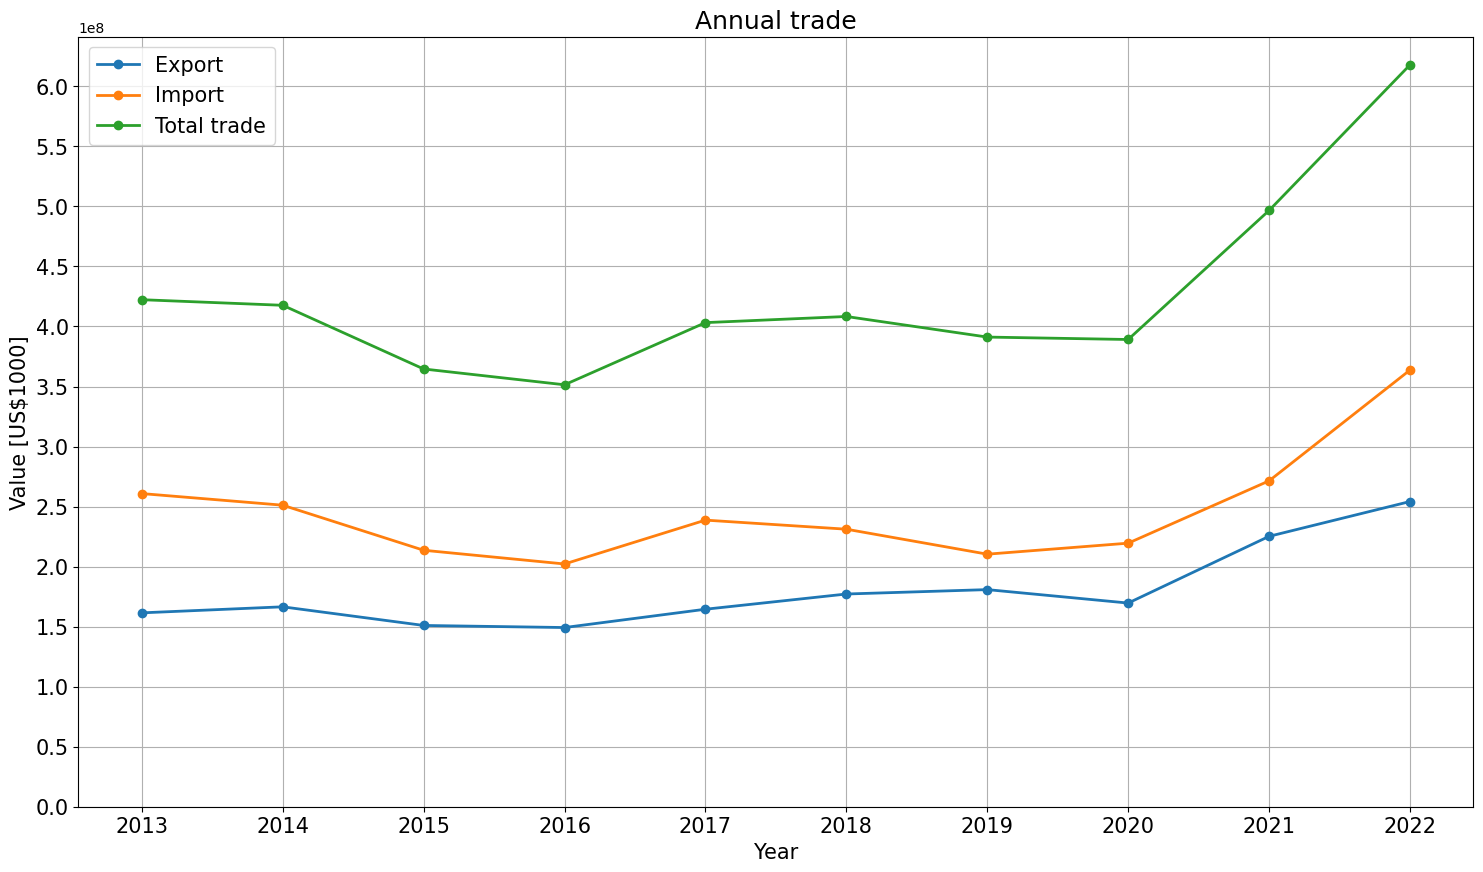

In [23]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['Total_E'], linestyle='-', marker='o', label = 'Export', linewidth = 2)
plt.plot(EI_f.index, EI_f['Total_I'], linestyle='-', marker='o', label = 'Import', linewidth = 2)
plt.plot(EI_f.index, EI_f['E+I'], linestyle='-', marker='o', label = 'Total trade', linewidth = 2)
plt.grid()
plt.title('Annual trade', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'Value [US$1000]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(range(0, 62*10**7+1, 5*10**7), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Export was lower than import every year thus the annual balance was always negative.<br>
There was large increase of both import and export after 2020. Thus total trade value increased sharply. However import increased more than export.<br>
Before 2020 the export values were relatively stable and kept more smooth changes comparing to the import.

In [24]:
#EI_f.iloc[:, :-2].plot.bar(figsize = (18,10), stacked = True, title = 'Annual trade').legend(['Export', 'Import'])

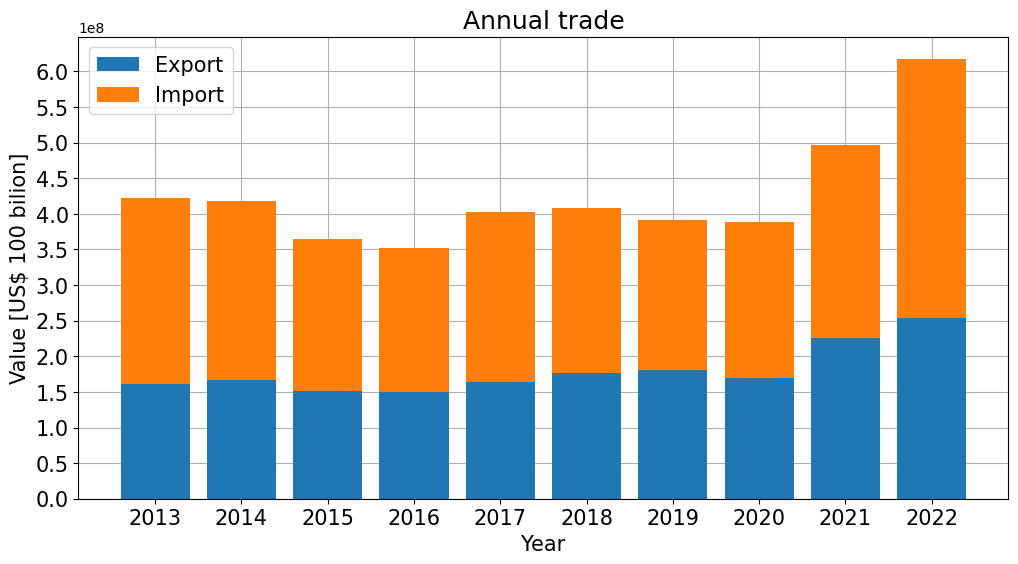

In [25]:
plt.figure(figsize = (12,6))
plt.bar(EI_f.index, EI_f['Total_E'], label = 'Export', color = 'tab:blue', zorder=2)
plt.bar(EI_f.index, EI_f['Total_I'], label = 'Import', bottom = EI_f['Total_E'], color = 'tab:orange', zorder=2)
plt.title('Annual trade', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'Value [US$ 100 bilion]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(range(0, 62*10**7+1, 5*10**7), fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(zorder=0)
plt.show()

### Export, import change plots

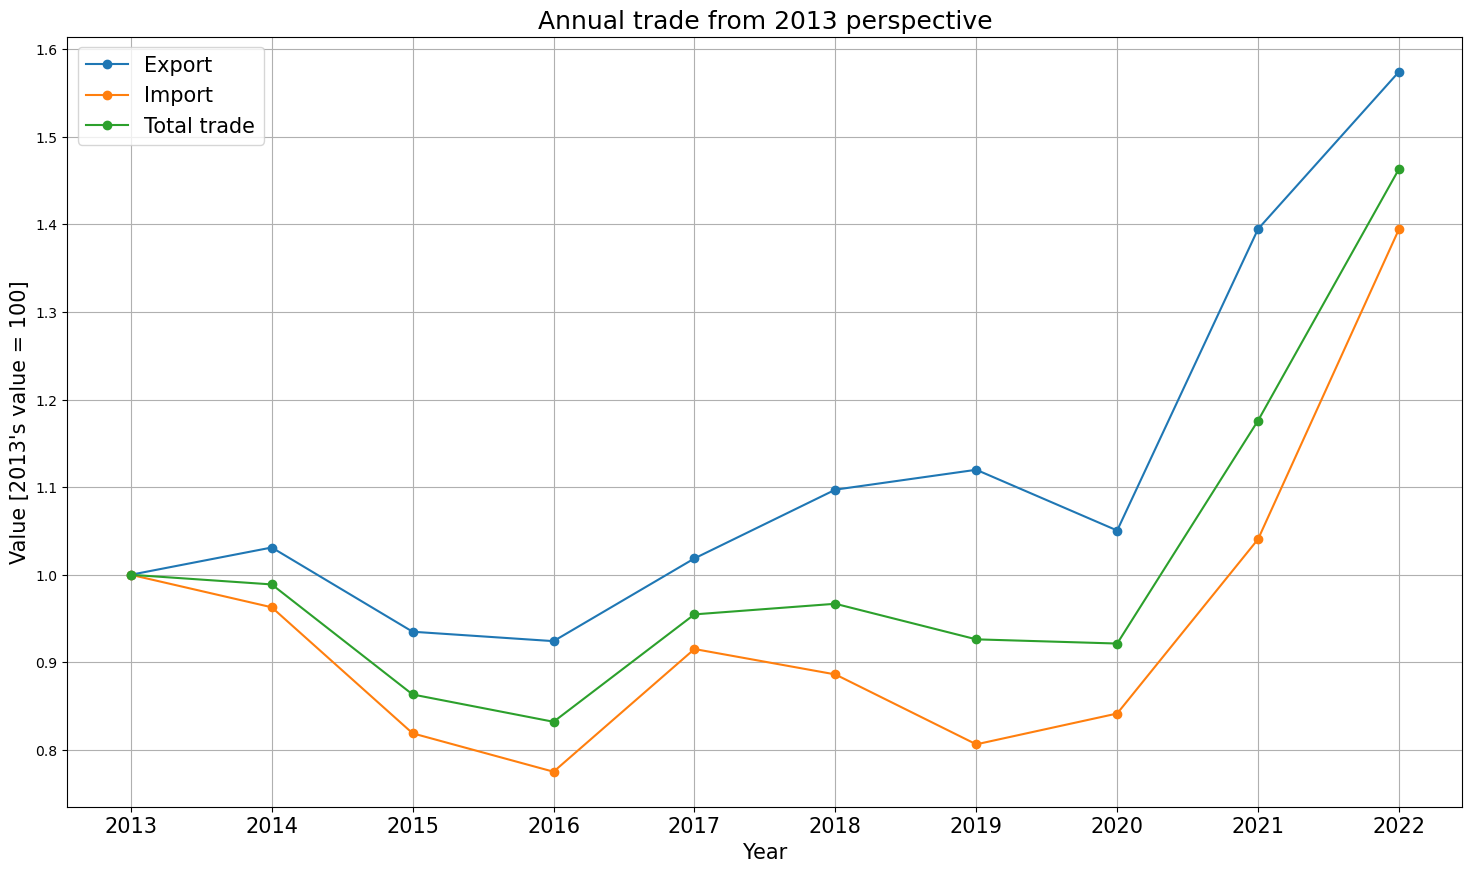

In [26]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['E_2013'], label = 'Export', marker='o')
plt.plot(EI_f.index, EI_f['I_2013'], label = 'Import', marker='o')
plt.plot(EI_f.index, EI_f['E+I_2013'], label = 'Total trade', marker='o')
plt.title('Annual trade from 2013 perspective', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = "Value [2013's value = 100]", fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
#plt.yticks(range(0, 62*10**7+1, 5*10**7), fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(zorder=0)
plt.show()

In [27]:
#make percentage change of both export and import
EI_pc = EI_f.pct_change().iloc[1:].rename(columns = {'Total_E': 'E', 'Total_I': 'I'})
EI_pc = EI_pc.rename(columns = {x: x+'_%Y/Y' for x in EI_pc.columns})
EI_pc

,E_%Y/Y,I_%Y/Y,E+I_%Y/Y,E-I_%Y/Y,E/I_%Y/Y,E_2013_%Y/Y,I_2013_%Y/Y,E+I_2013_%Y/Y
Year,,,,,,,,
2014,0.031112,-0.037115,-0.011026,-0.148017,0.070856,0.031112,-0.037115,-0.011026
2015,-0.093227,-0.149410,-0.127011,-0.259937,0.066052,-0.093227,-0.149410,-0.127011
2016,-0.011492,-0.053506,-0.036108,-0.154778,0.044389,-0.011492,-0.053506,-0.036108
2017,0.102164,0.180652,0.147320,0.401915,-0.066479,0.102164,0.180652,0.147320
2018,0.077049,-0.031681,0.012677,-0.272658,0.112287,0.077049,-0.031681,0.012677
2019,0.020681,-0.090015,-0.041985,-0.453308,0.121646,0.020681,-0.090015,-0.041985
2020,-0.061908,0.043603,-0.005172,0.690100,-0.101102,-0.061908,0.043603,-0.005172
2021,0.327620,0.236468,0.276202,-0.073537,0.073719,0.327620,0.236468,0.276202
2022,0.128690,0.340003,0.244178,1.369854,-0.157695,0.128690,0.340003,0.244178


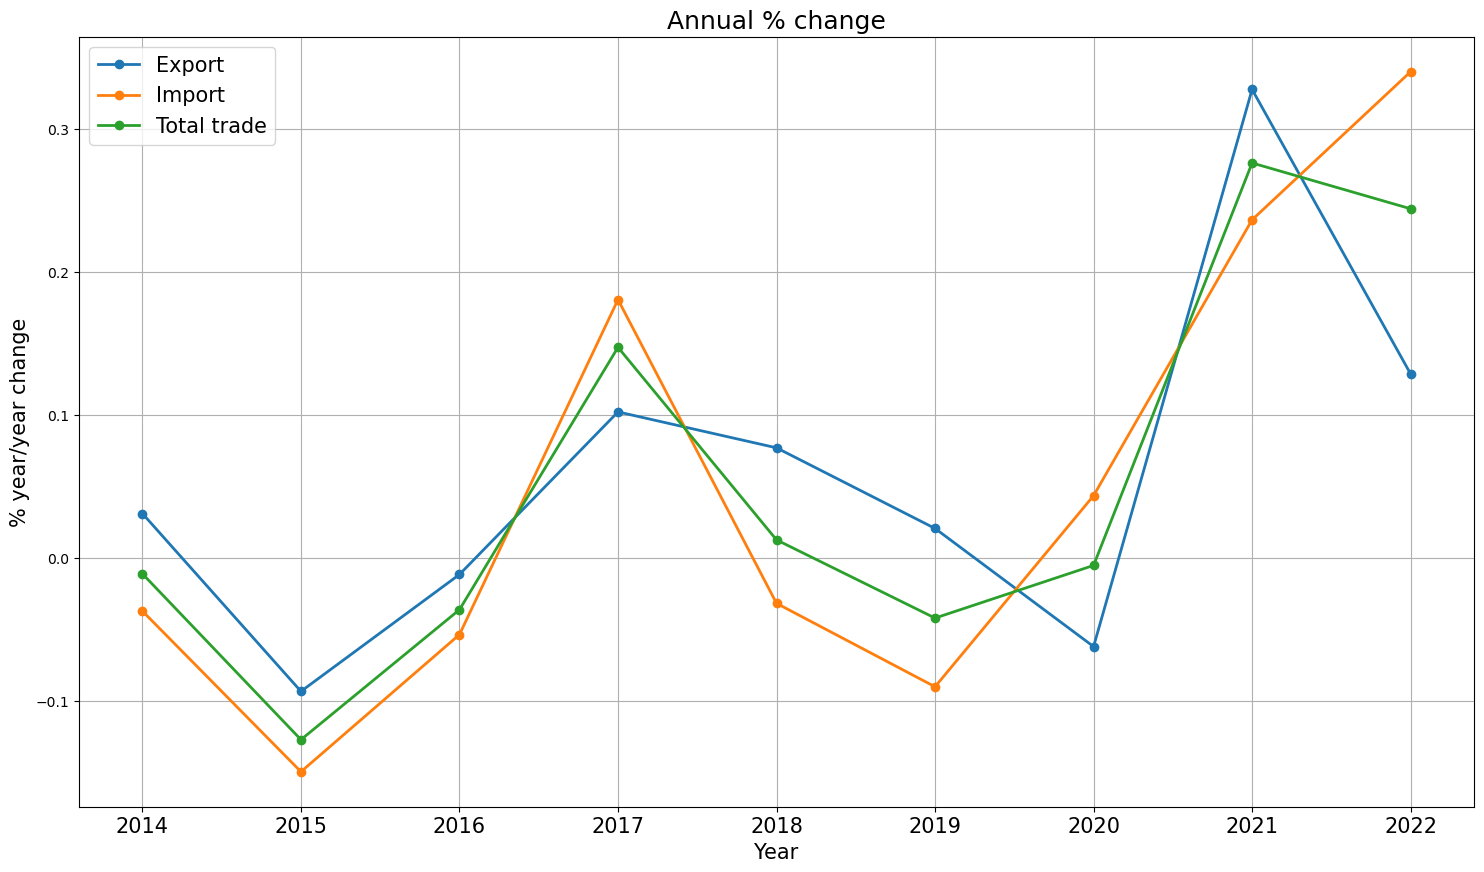

In [28]:
plt.figure(figsize = (18,10))
plt.plot(EI_pc.index, EI_pc['E_%Y/Y'], linestyle='-', marker='o', label = 'Export', linewidth = 2)
plt.plot(EI_pc.index, EI_pc['I_%Y/Y'], linestyle='-', marker='o', label = 'Import', linewidth = 2)
plt.plot(EI_pc.index, EI_pc['E+I_%Y/Y'], linestyle='-', marker='o', label = 'Total trade', linewidth = 2)
plt.grid()
plt.title('Annual % change', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = '% year/year change', fontsize = 15)
plt.xticks(ticks = EI_pc.index, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Similarly to previous plots it can be seen import changes were more turbulent before 2020 comparing to export. Both export and import are increasing since 2020 but export changes seem to slow down recently. Import dynamics were still increasing since 2020. 

### Export and import comparison 

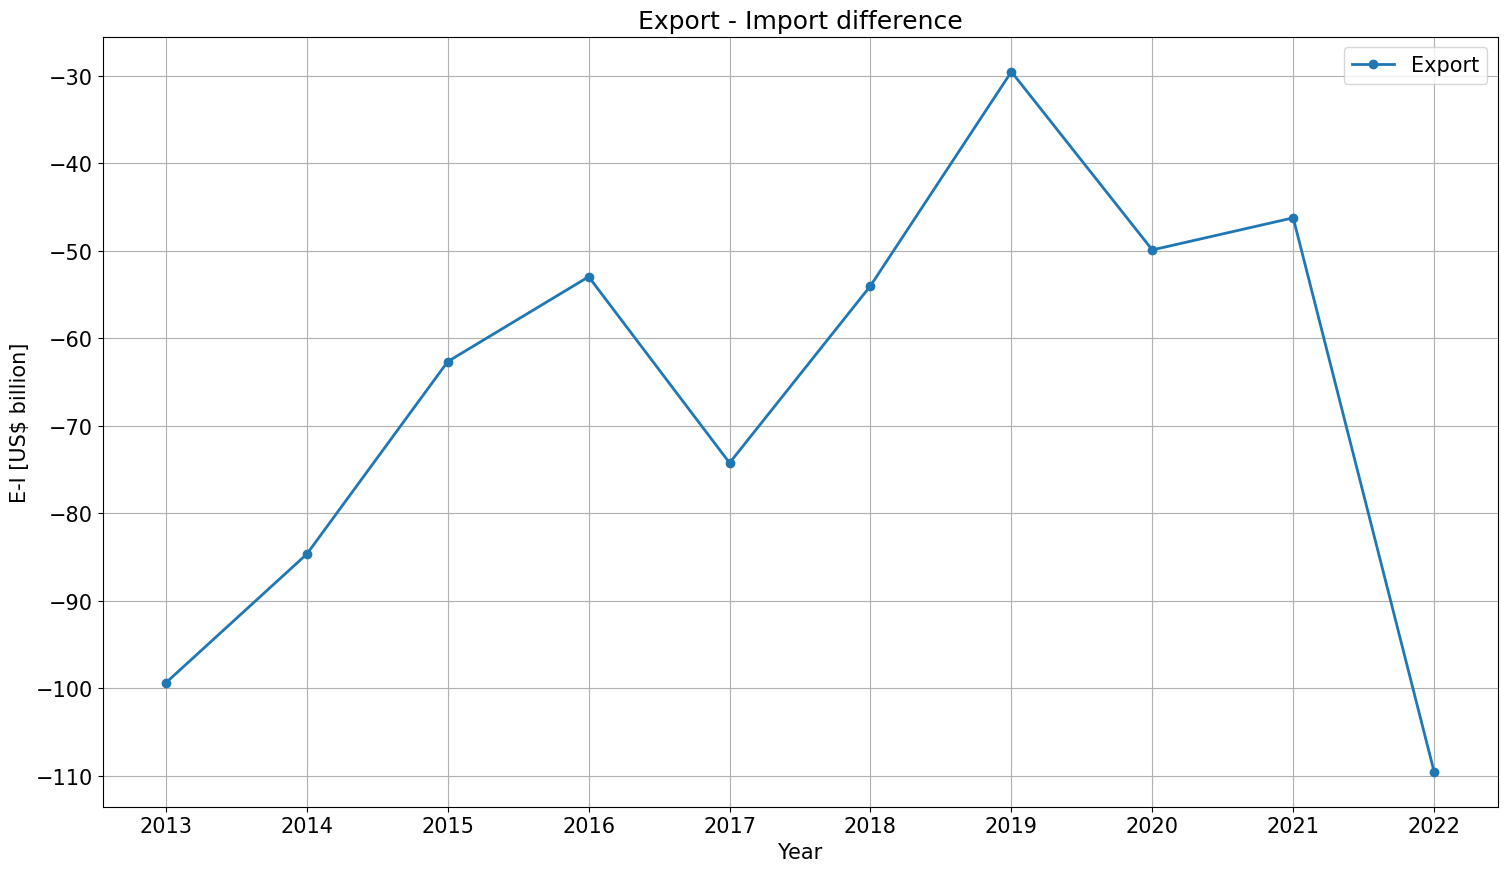

In [29]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['E-I']/10**6, linestyle='-', marker='o', label = 'Export', linewidth = 2)
plt.grid()
plt.title('Export - Import difference', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'E-I [US$ billion]', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(range(-110, -20, 10), fontsize = 15)
current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x).replace(',',' ') for x in current_values])
plt.legend(fontsize = 15)
plt.show()

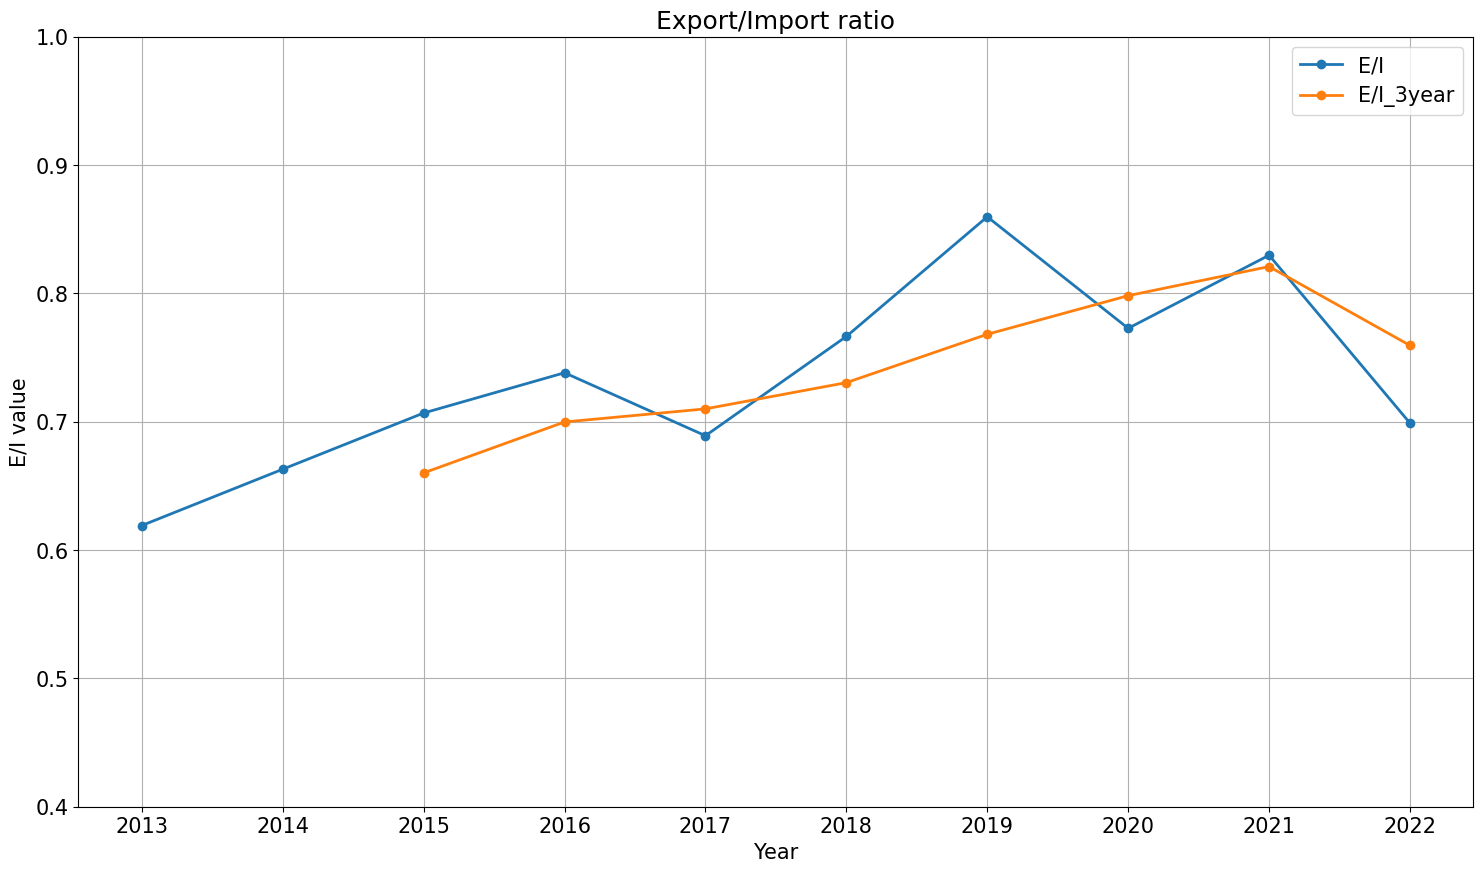

In [30]:
plt.figure(figsize = (18,10))
plt.plot(EI_f.index, EI_f['E/I'], linestyle='-', marker='o', label = 'E/I', linewidth = 2)
plt.plot(EI_f.index, EI_f['Total_E'].rolling(3).sum()/EI_f['Total_I'].rolling(3).sum(), 
         linestyle='-', marker='o', label = 'E/I_3year', linewidth = 2)
plt.grid()
plt.title('Export/Import ratio', fontsize = 18)
plt.xlabel(xlabel = 'Year', fontsize = 15)
plt.ylabel(ylabel = 'E/I value', fontsize = 15)
plt.xticks(ticks = EI_f.index, fontsize = 15)
plt.yticks(np.linspace(0.4, 1, 7), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

The trade balance was always negative (export < import) thus the E/I ratio value was always lower than 1. Moreover in 2022 the trade balance reached research's historical low.<br>
E/I had stable growth in 2013-2016. 3-year E/I kept quite stable growth to 2021 but in 2022 there was the first and only drop of this indicator's value.

## 3. Last year analysis by countries

Content below might be more chaotic from previous ones due to some unclear activities.Therefore in this cell the list of activities was made. Generally before displaying data and making observations, new data preparation was need to be made. <br>The full list of actions is:<br>
<ol>
    <li>Merging import and export data from 2022</li>
    <li>Data verification, filling missing values and making new columns</li>
    <li>Sample/Head data review and making plots and observations</li>
</ol>

#### 1. Merging import and export data from 2022

Merging below could be done using:<br>
<i>select dfe.Ccode, dfe.Country, dfe.Total as E, dfi.Total as I<br>
from dfe<br>
full outer join dfi<br>
on dfe.Ccode = dfi.Ccode and dfe.Country = dfi.Country<br>
where dfe.Year = 2022 and dfi.Year = 2022;</i>

In [31]:
#merging export and import tables for 2022 year
cEI = pd.merge(dfe[dfe['Year'] == 2022].iloc[:,  1:4].rename(columns = {'Total': 'E'}),
               dfi[dfi['Year'] == 2022].iloc[:,  1:4].rename(columns = {'Total': 'I'}), 
               how = 'outer',
               on = ['Ccode', 'Country'])
cEI

,Ccode,Country,E,I
0,1,France,9.534537e+06,9.429722e+06
1,3,Netherlands,8.026561e+06,4.497260e+06
2,4,Germany,2.114274e+07,2.403295e+07
3,5,Italy,1.239636e+07,1.408227e+07
4,6,United Kingdom,1.300519e+07,5.904426e+06
...,...,...,...,...
231,813,Pitcairn,NaN,2.791000e+00
232,836,Norfolk Islands,NaN,1.480900e+01
233,839,Tokelau Islands,NaN,7.082000e+00
234,891,Antarctica,NaN,8.336000e+00


#### 2. Data verification, filling missing values and making new columns

In [32]:
#find NaN values in export or import and display those countries by 'Ccode:Country' key:value dictionary
ctest = cEI[(cEI['I'].isna()) | (cEI['E'].isna())][['Ccode', 'Country']].set_index(['Ccode']).to_dict()['Country']
ctest

{21: 'Ceuta',
 377: 'Mayotte',
 466: 'Saint Barthelemy',
 467: 'St. Vincent and Grenadines',
 475: 'Curaçao',
 479: 'Sint Maarten',
 807: 'Tuvalu',
 817: 'Tonga',
 825: 'Palau',
 894: 'French Southern Territories',
 45: 'Vatican City State',
 408: 'St Pierre and Miquelon',
 813: 'Pitcairn',
 836: 'Norfolk Islands',
 839: 'Tokelau Islands',
 891: 'Antarctica',
 892: 'Bouvet Islands'}

In [33]:
#check everything is correct with 'unjoined' countries
a = set(dfe[dfe['Year'] == 2022]['Country'])
b = set(dfi[dfi['Year'] == 2022]['Country'])
test1 = (a-b).union(b-a)
test2 = ctest.values()
print(sorted(test1) == sorted(test2))

True


In [34]:
#fill missing values with 0
cEI = cEI.fillna(0)
cEI

,Ccode,Country,E,I
0,1,France,9.534537e+06,9.429722e+06
1,3,Netherlands,8.026561e+06,4.497260e+06
2,4,Germany,2.114274e+07,2.403295e+07
3,5,Italy,1.239636e+07,1.408227e+07
4,6,United Kingdom,1.300519e+07,5.904426e+06
...,...,...,...,...
231,813,Pitcairn,0.000000e+00,2.791000e+00
232,836,Norfolk Islands,0.000000e+00,1.480900e+01
233,839,Tokelau Islands,0.000000e+00,7.082000e+00
234,891,Antarctica,0.000000e+00,8.336000e+00


In [35]:
#making new columns
cEI['E/I'] = cEI['E']/cEI['I']
cEI['E+I'] = cEI['E'] + cEI['I']
cEI = cEI.sort_values(by = 'E+I', ascending = False)
cEI = cEI.reset_index(drop = True)

#### 3. Sample/Head data review and making plots
Firstly sample or first part of data was watched (default first 5 countries using '.head()', countries sorted by Export, countries sorted by Import and few more conditions). After this review there is a visualisation, followed by reviewing top 20 trading partners.

In [36]:
cEI.head()

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07


In [37]:
#check values sorted by export
cEI.sort_values(by = 'E', ascending = False)

,Ccode,Country,E,I,E/I,E+I
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07
10,612,Iraq,1.375054e+07,1.419235e+06,9.688695,1.516977e+07
7,6,United Kingdom,1.300519e+07,5.904426e+06,2.202617,1.890961e+07
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07
...,...,...,...,...,...,...
229,839,Tokelau Islands,0.000000e+00,7.082000e+00,0.000000,7.082000e+00
230,813,Pitcairn,0.000000e+00,2.791000e+00,0.000000,2.791000e+00
232,892,Bouvet Islands,0.000000e+00,1.438000e+00,0.000000,1.438000e+00
234,45,Vatican City State,0.000000e+00,7.050000e-01,0.000000,7.050000e-01


In [38]:
#check values sorted by import
cEI.sort_values(by = 'I', ascending = False)

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07
...,...,...,...,...,...,...
202,807,Tuvalu,5.807600e+02,0.000000e+00,inf,5.807600e+02
205,475,Curaçao,2.555160e+02,0.000000e+00,inf,2.555160e+02
206,466,Saint Barthelemy,2.322240e+02,0.000000e+00,inf,2.322240e+02
217,817,Tonga,1.000510e+02,0.000000e+00,inf,1.000510e+02


In [39]:
#check countries with export or import higher than 10 billion US$ (higher than 10**7 but the unit is US$1000)
cEI[(cEI['E'] >= 10**7) | (cEI['I'] >= 10**7)]

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07
7,6,United Kingdom,1.300519e+07,5.904426e+06,2.202617,1.890961e+07
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07
10,612,Iraq,1.375054e+07,1.419235e+06,9.688695,1.516977e+07
12,664,India,1.637414e+06,1.069711e+07,0.153071,1.233452e+07


Filtering to make proper annotations. Below one of them was presented. In SQL it could be done by this query:<br>
<i>select *<br>
from cEI<br>
where E/I < 0,2 and I > 10000000;</i>

In [40]:
cEI[(cEI['E/I'] < 0.2) & (cEI['I'] > 10**7)]

,Ccode,Country,E,I,E/I,E+I
0,75,Russia,9343625.796,5.884899e+07,0.158773,6.819261e+07
2,720,China,3281335.253,4.135473e+07,0.079346,4.463607e+07
3,999,Confidential Country,990405.340,3.447250e+07,0.028730,3.546291e+07
8,39,Switzerland,1334757.785,1.533590e+07,0.087035,1.667066e+07
12,664,India,1637413.766,1.069711e+07,0.153071,1.233452e+07


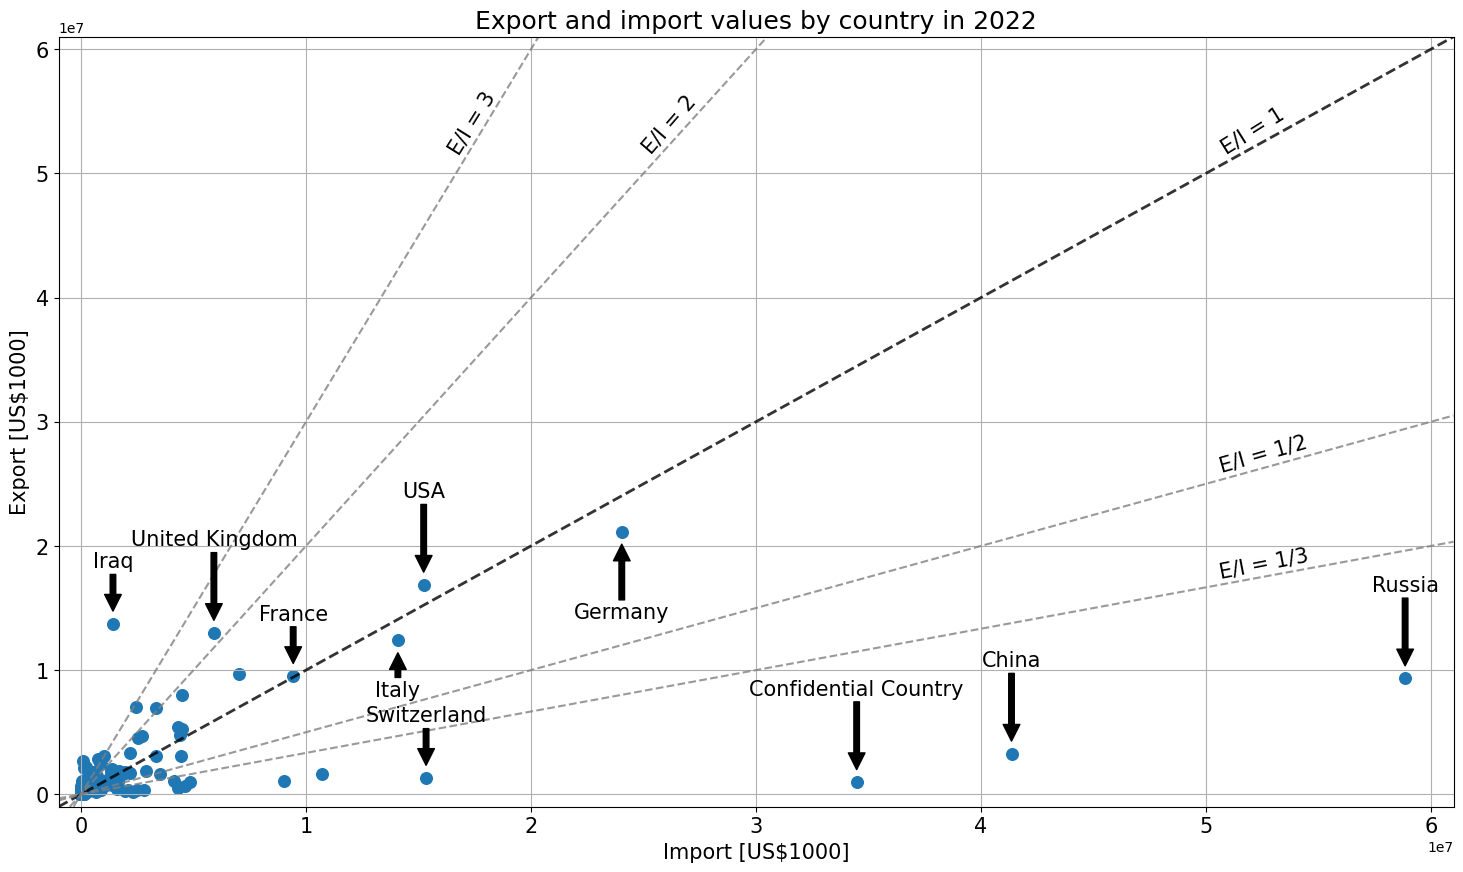

In [41]:
#scatter plot with axes
plt.figure(figsize = (18,10))
plt.scatter(x = cEI['I'], y = cEI['E'], s = 70)
plt.grid()
plt.title('Export and import values by country in 2022', fontsize = 18)
plt.xlabel(xlabel = 'Import [US$1000]', fontsize = 15)
plt.ylabel(ylabel = 'Export [US$1000]', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([-1*10**6, 6.1*10**7])
plt.ylim([-1*10**6, 6.1*10**7])
#axes
plt.axline((0, 0), slope = 1, color = 'black', linestyle = '--', alpha = 0.8, linewidth = 2)
plt.axline((0, 0), slope = 2, color = 'gray', linestyle = '--', alpha = 0.8)
plt.axline((0, 0), slope = 0.5, color = 'gray', linestyle = '--', alpha = 0.8)
plt.axline((0, 0), slope = 3, color = 'gray', linestyle = '--', alpha = 0.8)
plt.axline((0, 0), slope = 1/3, color = 'gray', linestyle = '--', alpha = 0.8)
plt.text(x = 5.05*10**7, y = 2.6*10**7, s = 'E/I = 1/2', rotation = 16, fontsize = 15)
plt.text(x = 5.05*10**7, y = 5.16*10**7, s = 'E/I = 1', rotation = 32, fontsize = 15)
plt.text(x = 2.48*10**7, y = 5.16*10**7, s = 'E/I = 2', rotation = 49, fontsize = 15)
plt.text(x = 5.05*10**7, y = 1.74*10**7, s = 'E/I = 1/3', rotation = 11, fontsize = 15)
plt.text(x = 1.62*10**7, y = 5.16*10**7, s = 'E/I = 3', rotation = 58, fontsize = 15)
#arrows and texts
plt.annotate('Russia', xy = (cEI[cEI['Country'] == 'Russia']['I'], cEI[cEI['Country'] == 'Russia']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Russia']['I'], cEI[cEI['Country'] == 'Russia']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('China', xy = (cEI[cEI['Country'] == 'China']['I'], cEI[cEI['Country'] == 'China']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'China']['I'], cEI[cEI['Country'] == 'China']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Confidential Country', xy = (cEI[cEI['Country'] == 'Confidential Country']['I'], cEI[cEI['Country'] == 'Confidential Country']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Confidential Country']['I'], cEI[cEI['Country'] == 'Confidential Country']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Germany', xy = (cEI[cEI['Country'] == 'Germany']['I'], cEI[cEI['Country'] == 'Germany']['E'] - 10**6), 
             xytext = (cEI[cEI['Country'] == 'Germany']['I'], cEI[cEI['Country'] == 'Germany']['E'] - 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Italy', xy = (cEI[cEI['Country'] == 'Italy']['I'], cEI[cEI['Country'] == 'Italy']['E'] - 10**6), 
             xytext = (cEI[cEI['Country'] == 'Italy']['I'], cEI[cEI['Country'] == 'Italy']['E'] - 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('USA', xy = (cEI[cEI['Country'] == 'USA']['I'], cEI[cEI['Country'] == 'USA']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'USA']['I'], cEI[cEI['Country'] == 'USA']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('United Kingdom', xy = (cEI[cEI['Country'] == 'United Kingdom']['I'], cEI[cEI['Country'] == 'United Kingdom']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'United Kingdom']['I'], cEI[cEI['Country'] == 'United Kingdom']['E'] + 7*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Iraq', xy = (cEI[cEI['Country'] == 'Iraq']['I'], cEI[cEI['Country'] == 'Iraq']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Iraq']['I'], cEI[cEI['Country'] == 'Iraq']['E'] + 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('France', xy = (cEI[cEI['Country'] == 'France']['I'], cEI[cEI['Country'] == 'France']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'France']['I'], cEI[cEI['Country'] == 'France']['E'] + 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.annotate('Switzerland', xy = (cEI[cEI['Country'] == 'Switzerland']['I'], cEI[cEI['Country'] == 'Switzerland']['E'] + 10**6), 
             xytext = (cEI[cEI['Country'] == 'Switzerland']['I'], cEI[cEI['Country'] == 'Switzerland']['E'] + 4.5*10**6), 
             arrowprops = {'color' : 'black'}, horizontalalignment = 'center', fontsize = 15)
plt.show()

Lots of countries with strong influence on total trade are located below E/I = 1 line, so Türkiye buys from them more than sell. Italy, France and German-related results are relatively close to the neutral score (E/I = 1) but on the other hand import's advantage over export is clearly seen by looking at the top 3 import countries whose import values (reminder: 'import' means the value the Türkiye imported from them) are higher than any export value. Those 3 countries are: 3. Confidential Country, 2. China, 1. Russia. Moreover import seemed to be strongly dependent on those 3 countries. Germany was the 4th import partner by value and the top partner by export.<br>
All 3 top importing partners have extremely low E/I ratio (below E/I=1/3 strongly), so it looks more like one-way trade partnership.<br>
Export seemed to be less unevenly distributed due to the lack of extremely high values because for the top 4 export desinations export values are similar and next countries' (sorted by export) decrease more gradually comparing to the import perspective.


In [42]:
#cEI[(cEI['E'] > 0.9*10**7) | (cEI['I'] > 0.9*10**7)].sort_values(by = 'E/I', ascending = False)

In [43]:
#top 20 countries by total trade in 2022
top = cEI.sort_values(by = 'E+I', ascending = False).head(20)
top['%E_Total'] = 100*top['E']/cEI['E'].sum()
top['%I_Total'] = 100*top['I']/cEI['I'].sum()
top

,Ccode,Country,E,I,E/I,E+I,%E_Total,%I_Total
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07,3.675736,16.180153
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07,8.317448,6.607705
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07,1.290861,11.370220
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07,0.389621,9.477993
4,400,USA,1.688555e+07,1.522877e+07,1.108792,3.211432e+07,6.642691,4.187053
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07,4.876666,3.871830
6,1,France,9.534537e+06,9.429722e+06,1.011115,1.896426e+07,3.750840,2.592642
7,6,United Kingdom,1.300519e+07,5.904426e+06,2.202617,1.890961e+07,5.116177,1.623384
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07,0.525087,4.216507
9,11,Spain,9.650335e+06,7.004021e+06,1.377828,1.665436e+07,3.796394,1.925711


In [44]:
print('% of export by top 20 countries:', top['%E_Total'].sum().round(2),
      '\n% of import by top 20 countries:',top['%I_Total'].sum().round(2))

% of export by top 20 countries: 60.79 
% of import by top 20 countries: 75.54


In [45]:
#countries with E/I < 1 from top 20 total trade value
top[top['E/I'] < 1]

,Ccode,Country,E,I,E/I,E+I,%E_Total,%I_Total
0,75,Russia,9.343626e+06,5.884899e+07,0.158773,6.819261e+07,3.675736,16.180153
1,4,Germany,2.114274e+07,2.403295e+07,0.879740,4.517568e+07,8.317448,6.607705
2,720,China,3.281335e+06,4.135473e+07,0.079346,4.463607e+07,1.290861,11.370220
3,999,Confidential Country,9.904053e+05,3.447250e+07,0.028730,3.546291e+07,0.389621,9.477993
5,5,Italy,1.239636e+07,1.408227e+07,0.880281,2.647863e+07,4.876666,3.871830
8,39,Switzerland,1.334758e+06,1.533590e+07,0.087035,1.667066e+07,0.525087,4.216507
12,664,India,1.637414e+06,1.069711e+07,0.153071,1.233452e+07,0.644151,2.941102
14,728,South Korea,1.051992e+06,9.004399e+06,0.116831,1.005639e+07,0.413848,2.475702
19,72,Ukraine,3.063797e+06,4.455399e+06,0.687659,7.519196e+06,1.205283,1.224983


Leading countries' scores review shows that Türkiye's import is strongly dependent on Russia, China and Confidential Country which have made around 37% of total turkish import. They have also very low E/I ratio which proves that those partnerships are mostly one-way oriented. Generally top 20 trading partners make over 75% of turkish import (so top 3 turkish import sources make half of top 20 trading partners' import).<br>
Top 20 trading partners make over 60% of turkish export so export in 2022 was clearly less dominated by single countries comparing to the import.<br>
It should be kept in mind we don't know Confidential Country's value is distributed among real countries officially, so the real value for any country may vary from current TURKSTAT data.

## 4. Other activities

In this chapter I want to prepare data for potential future research activities. Thus, the code focuses on foundational actions and very basic research which use to be a preparation for a more serious and advanced approach like time-series analysis, clustering etc. Generally this chapter is to sow the seed of inspiration for any other analyses in an undefined future.<br>

#### 1. Time-series dataframe
Code in this subchapter focuses on making time-series-like dataframe to visualise and check the monthly balance.

In [46]:
#making years list
years = dfi['Year'].unique()[::-1]

#making months list
months = []
for x in dfi.columns[3:]:
    months.append(x)

#making year-month strings list
ym = []
for x in years:
    for y in range(1, len(dfi.columns[4:]) + 1):
        if len(str(y)) == 1:
            date = str(x) + '-0' + str(y)
        else:
            date = str(x) + '-' + str(y)
        ym.append(date)
ym = ym[:-10]
#
print(ym, len(ym)/12, sep = '\n')

['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07'

In [47]:
pv = pd.DataFrame(columns = ['YM', 'E', 'I'])
pv['YM'] = ym
pv

,YM,E,I
0,2013-01,NaN,NaN
1,2013-02,NaN,NaN
2,2013-03,NaN,NaN
3,2013-04,NaN,NaN
4,2013-05,NaN,NaN
...,...,...,...
117,2022-10,NaN,NaN
118,2022-11,NaN,NaN
119,2022-12,NaN,NaN
120,2023-01,NaN,NaN


In [48]:
def monthly(df):
    monthly_list = []
    for x in df.drop(columns = ['Ccode', 'Country', 'Total']).groupby('Year').sum().values.tolist():
        for y in x:
            monthly_list.append(y)
    print(len(monthly_list[:-10]))
    return monthly_list[:-10]

In [49]:
#for x in dfi.drop(columns = ['Ccode', 'Country', 'Total']).groupby('Year').sum().values.tolist():
#    for y in x:
#        print(y)

In [50]:
pv['E'], pv['I'] = monthly(dfe), monthly(dfi)
pv['E+I'] = pv['E'] + pv['I']
pv['E-I'] = pv['E'] - pv['I']
pv['E/I'] = pv['E'] / pv['I']
pv

122
122


,YM,E,I,E+I,E-I,E/I
0,2013-01,1.226332e+07,1.956448e+07,3.182781e+07,-7.301158e+06,0.626816
1,2013-02,1.315518e+07,2.034570e+07,3.350087e+07,-7.190521e+06,0.646583
2,2013-03,1.406630e+07,2.132281e+07,3.538912e+07,-7.256508e+06,0.659683
3,2013-04,1.345001e+07,2.368834e+07,3.713836e+07,-1.023833e+07,0.567790
4,2013-05,1.414154e+07,2.383880e+07,3.798034e+07,-9.697255e+06,0.593215
...,...,...,...,...,...,...
117,2022-10,2.130840e+07,2.920248e+07,5.051088e+07,-7.894077e+06,0.729678
118,2022-11,2.187449e+07,3.065582e+07,5.253031e+07,-8.781329e+06,0.713551
119,2022-12,2.291287e+07,3.261160e+07,5.552448e+07,-9.698728e+06,0.702599
120,2023-01,1.935669e+07,3.360635e+07,5.296304e+07,-1.424966e+07,0.575983


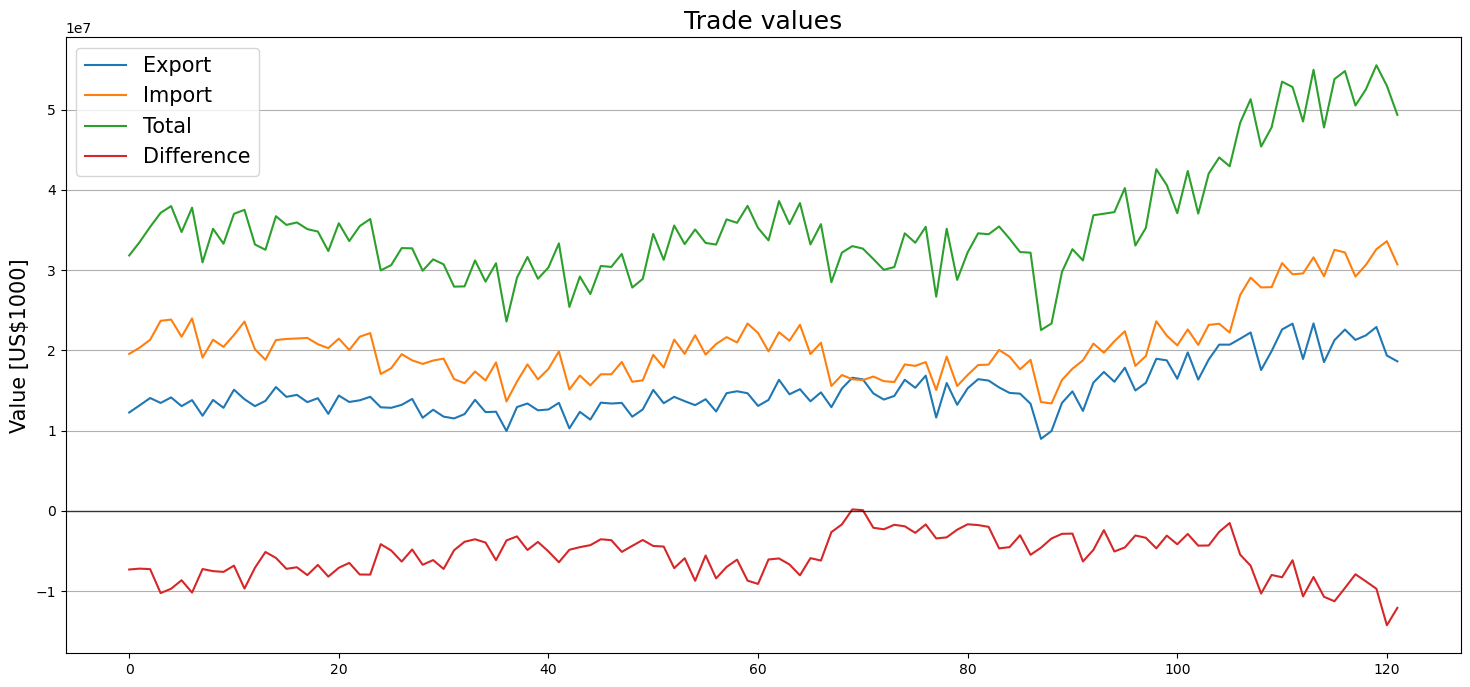

In [51]:
plt.figure(figsize = (18,8))
plt.plot(pv['E'], label = 'Export')
plt.plot(pv['I'], label = 'Import')
plt.plot(pv['E+I'], label = 'Total')
plt.plot(pv['E-I'], label = 'Difference')
plt.axline((0, 0), slope = 0, color = 'black', linestyle = '-', alpha = 0.7, linewidth = 1)
plt.title('Trade values', fontsize = 18)
plt.ylabel(ylabel = 'Value [US$1000]', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(axis = 'y')
plt.show()

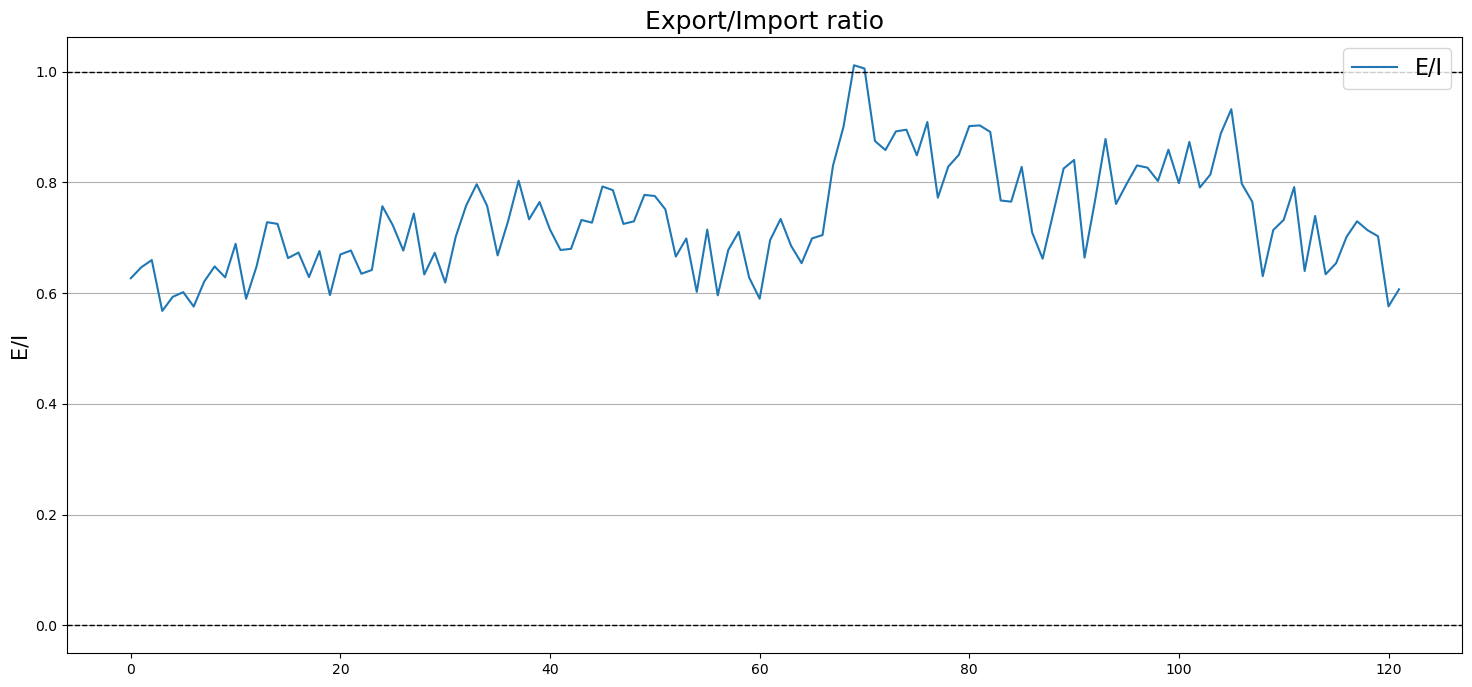

In [52]:
plt.figure(figsize = (18,8))
plt.plot(pv['E/I'], label = 'E/I')
plt.axline((0, 0), slope = 0, color = 'black', linestyle = '--', alpha = 1, linewidth = 1)
plt.axline((0, 1), slope = 0, color = 'black', linestyle = '--', alpha = 1, linewidth = 1)
plt.title('Export/Import ratio', fontsize = 18)
plt.ylabel(ylabel = 'E/I', fontsize = 15)
yticks = (np.arange(0, 1.1, 11))
plt.grid(axis = 'y')
plt.legend(fontsize = 16, loc = 1)
plt.show()

Similar result could have been achieved using stack and join:<br>
<i>def pvei(df):<br>
&emsp;data = df[df['Year'] < 2023].drop(columns = ['Country', 'Ccode', 'Total']).groupby(['Year']).sum()<br>
&emsp;data.index.name = None<br>
&emsp;data = pd.DataFrame(data.stack(), columns = ['Value'])<br>
&emsp;data.index = data.index.rename(['Year', 'Month'])<br>
&emsp;return data<br>
pve, pvi = pvei(dfe), pvei(dfi)<br>
pv = pve.join(pvi, on = ['Year', 'Month'], how = 'inner', lsuffix = '_E', rsuffix = '_I').rename(
    columns = {'Value_E': 'E', 'Value_I': 'I'})<br>
pv['E+I'] = pv['E'] + pv['I']<br>
pv['E-I'] = pv['E'] - pv['I']<br>
pv['E/I'] = pv['E'] / pv['I']<br></i><br>
And after the code above the there would have been plot codes. As a side effect the multiindex would have been created and we could have lost January and February 2023.

In [53]:
#month with the E/I ratio above 0.8
pv[pv['E/I'] > 0.8]

,YM,E,I,E+I,E-I,E/I
37,2016-02,1.293935e+07,1.611288e+07,2.905223e+07,-3173531.241,0.803044
67,2018-08,1.292675e+07,1.556687e+07,2.849363e+07,-2640118.761,0.830401
68,2018-09,1.524737e+07,1.693134e+07,3.217871e+07,-1683967.610,0.900541
69,2018-10,1.659065e+07,1.640267e+07,3.299332e+07,187981.124,1.011460
70,2018-11,1.638688e+07,1.629539e+07,3.268227e+07,91484.928,1.005614
71,2018-12,1.464570e+07,1.674467e+07,3.139037e+07,-2098977.927,0.874648
72,2019-01,1.387483e+07,1.616488e+07,3.003971e+07,-2290057.578,0.858331
73,2019-02,1.432304e+07,1.605651e+07,3.037956e+07,-1733470.545,0.892039
74,2019-03,1.633586e+07,1.825048e+07,3.458634e+07,-1914613.912,0.895092
75,2019-04,1.534062e+07,1.807315e+07,3.341377e+07,-2732527.964,0.848807


In [54]:
pv[pv['E/I'] > 1]

,YM,E,I,E+I,E-I,E/I
69,2018-10,1.659065e+07,1.640267e+07,3.299332e+07,187981.124,1.011460
70,2018-11,1.638688e+07,1.629539e+07,3.268227e+07,91484.928,1.005614


In the chapter no. 2 where the annual trade analysis was made, in every year the balance was negative (export > import). Here in the monthly approach it can be seen that except 2018-10 and 2018-11 all months ended with the same general result (negative balance).<br>
About 1.5 year ago the E/I ratio fell down from 0.8+ values to the values from the first years of this research. Also the trade balance reached historical low recently.<br><br>
The current state of this <i>pv</i> dataframe seems to be well prepared for potential time-series analyses.

#### 2. Standardised values
Monthly values were standardised separately for every year. The result might be helpful with potential clustering activities which could show us some schemes or trends among months. 

In [55]:
def monthly_std(df):
    monthly_list = []
    for x in df[df['Year'] < 2023].drop(columns = ['Country', 'Ccode', 'Total']).groupby(['Year']).sum().apply(lambda x: (x-x.mean())/x.std(), axis=1).values.tolist():
        for y in x:
            monthly_list.append(y)
    print(len(monthly_list))
    return monthly_list

In [56]:
pv_std = pd.DataFrame(columns = ['YM', 'E', 'I'])
pv_std['YM'] = ym[:-2]
pv_std['E'], pv_std['I'] = monthly_std(dfe), monthly_std(dfi)
pv_std

120
120


,YM,E,I
0,2013-01,-1.349014,-1.265942
1,2013-02,-0.340885,-0.810352
2,2013-03,0.689034,-0.240517
3,2013-04,-0.007606,1.139018
4,2013-05,0.774083,1.226759
...,...,...,...
115,2022-08,0.046678,1.313978
116,2022-09,0.709026,1.120330
117,2022-10,0.062814,-0.654409
118,2022-11,0.346636,0.204920


In [57]:
pv_std[['Year', 'Month']] = pv_std['YM'].str.split('-', expand = True)
pv_std = pv_std[['Year', 'Month', 'E', 'I']]
pv_std

,Year,Month,E,I
0,2013,01,-1.349014,-1.265942
1,2013,02,-0.340885,-0.810352
2,2013,03,0.689034,-0.240517
3,2013,04,-0.007606,1.139018
4,2013,05,0.774083,1.226759
...,...,...,...,...
115,2022,08,0.046678,1.313978
116,2022,09,0.709026,1.120330
117,2022,10,0.062814,-0.654409
118,2022,11,0.346636,0.204920


In [58]:
pv_std[['Month', 'E', 'I']].groupby('Month').describe()

E                                                              \
      count      mean       std       min       25%       50%       75%   
Month                                                                     
01     10.0 -1.110216  0.837762 -1.983593 -1.764328 -1.347324 -0.832111   
02     10.0 -0.370845  0.548671 -1.195619 -0.721791 -0.412615  0.079840   
03     10.0  0.799941  0.613758 -0.290269  0.695597  0.770468  1.148905   
04     10.0  0.105543  0.936104 -1.911230 -0.141686  0.036140  0.350819   
05     10.0 -0.125330  0.984567 -1.548405 -1.090541  0.240722  0.655362   
06     10.0 -0.188915  0.934426 -2.228979 -0.440006 -0.142078  0.317250   
07     10.0 -0.415919  0.812057 -1.719940 -1.030770 -0.244333  0.259644   
08     10.0 -0.837794  0.864726 -2.179044 -1.428546 -0.910395  0.010638   
09     10.0  0.105276  0.738507 -1.231889 -0.445841  0.401010  0.668670   
10     10.0  0.663721  0.753499 -0.689929  0.253730  0.856921  1.109145   
11     10.0  0.755644  0.658480 -0.333685  0.440812  0.756904  1.137020   
12     10.0  0.618894  0.577183 -0.276136  0.259196  0.666266  0.885860   

                    I                                                    \
            max count      mean       std       min       25%       50%   
Month                                                                     
01     0.405731  10.0 -0.880833  0.940209 -1.937691 -1.486348 -1.073709   
02     0.401485  10.0 -0.860620  0.768139 -2.234661 -1.347849 -0.880934   
03     1.904863  10.0  0.465623  0.535615 -0.240517  0.224454  0.357417   
04     1.695154  10.0 -0.008423  0.877317 -1.694621 -0.436628  0.047493   
05     1.158840  10.0  0.265518  0.953484 -1.753970 -0.210622  0.545651   
06     1.091273  10.0  0.166425  0.927509 -1.592668 -0.113867  0.049865   
07     0.559793  10.0  0.222648  0.851985 -1.037556 -0.526279  0.225095   
08     0.194816  10.0 -0.452525  0.906038 -1.534263 -1.243171 -0.437458   
09     0.827145  10.0 -0.054958  0.855314 -1.590683 -0.639896 -0.003158   
10     1.553362  10.0 -0.205993  0.644982 -1.044740 -0.728464 -0.245758   
11     1.857562  10.0  0.222584  0.855339 -1.300767  0.105129  0.328541   
12     1.471705  10.0  1.120554  0.823302 -0.919810  1.044837  1.333052   

                           
            75%       max  
Month                      
01    -0.681405  1.064627  
02    -0.285285  0.224483  
03     0.751514  1.454757  
04     0.664056  1.139018  
05     0.652918  1.434840  
06     0.736701  1.819865  
07     0.964486  1.310160  
08     0.126090  1.313978  
09     0.527713  1.120330  
10     0.340317  0.785011  
11     0.743267  1.407058  
12     1.521804  2.117562

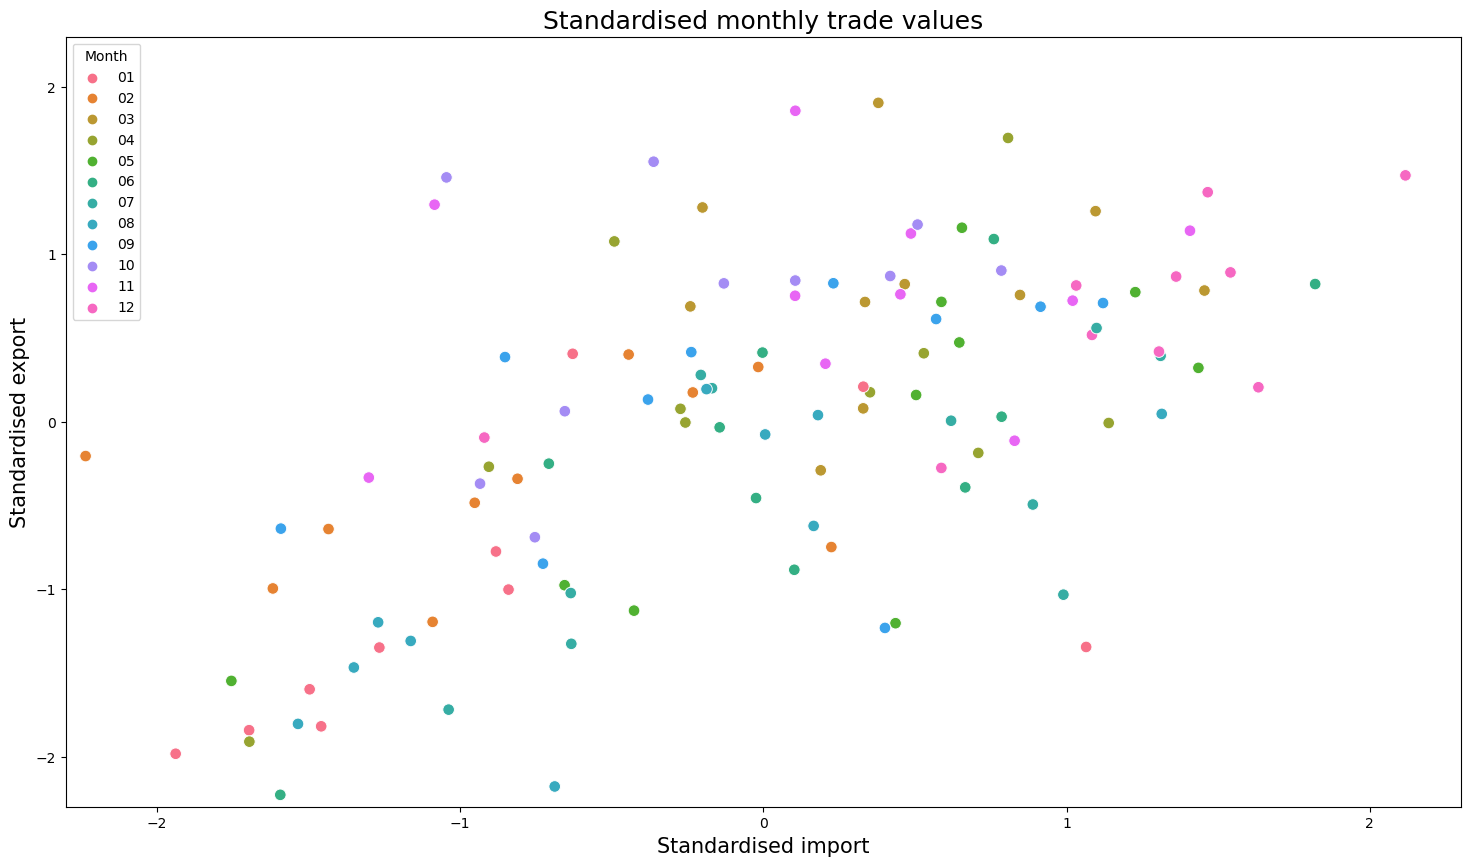

In [59]:
plt.figure(figsize=(18, 10))
sns.scatterplot(data=pv_std, x=pv_std['I'], y=pv_std['E'], hue=pv_std['Month'], s = 70)
plt.xlabel(xlabel = 'Standardised import', fontsize = 15)
plt.ylabel(ylabel = 'Standardised export', fontsize = 15)
plt.title(label = 'Standardised monthly trade values', fontsize = 18)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

Data was standardised and both year and month were extracted as columns so they should be easy to group if it's needed. To sum it up, the data seems to be ready to any potential future analyses (clustering for instance).